In [2]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(['u','v'])

G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [3]:
G.add_edge(1,2)
G.add_edge('u','v')

In [4]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

In [5]:
G.add_edge('u','w')

In [6]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [7]:
G.remove_node(2)

In [8]:
G.remove_nodes_from([4,5])

In [9]:
G.remove_edge(1,3)

In [10]:
G.remove_edges_from([(1,2), ('u','v')])

In [11]:
G.number_of_nodes()

6

In [12]:
G.number_of_edges()

2

In [25]:
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))

TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

In [26]:
G = nx.karate_club_graph()

In [27]:
import matplotlib.pyplot as plt

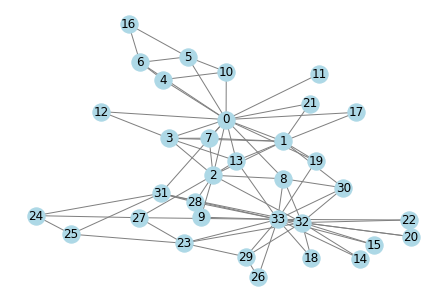

In [28]:
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.savefig('karate_graph.pdf')

In [29]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [30]:
G.degree()[33]

17

In [31]:
G.degree(33)

17

In [32]:
n, e = G.number_of_nodes(), G.number_of_edges()

In [33]:
n

34

In [34]:
e

78

In [35]:
G.degree(0) is G.degree()[0]

True

In [36]:
from scipy.stats import bernoulli

In [61]:
bernoulli.rvs(p=0.2)

0

In [62]:
N = 20
p = 0.2

In [77]:
def er_graph(N, p):
    """
    Gera um gráfico ER aleatório
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

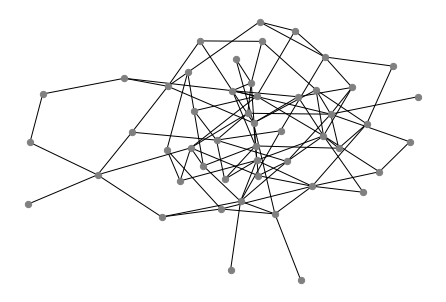

In [101]:
nx.draw(er_graph(50, 0.08), node_size=40, node_color='gray')

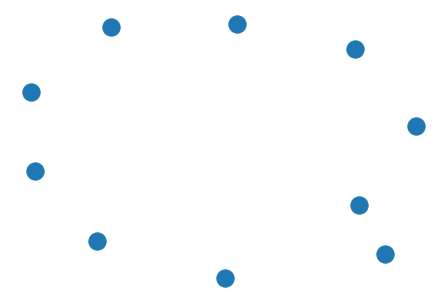

In [106]:
nx.draw(nx.erdos_renyi_graph(10, 0))

In [110]:
def plot_degree_distribution(G):
    plt.hist(list(dict(G.degree()).values()), histtype='step')
    plt.xlabel('Degree $k$')
    plt.ylabel('$P(k)$')
    plt.title('Degree distribution')

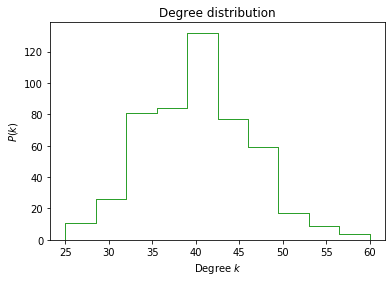

In [114]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)
plt.savefig('hist_3.pdf')

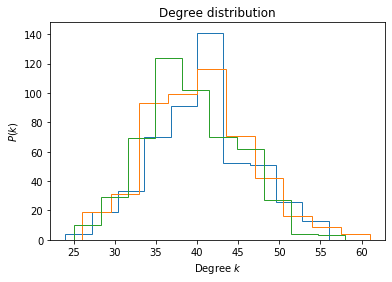

In [115]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plot_degree_distribution(G3)
plt.savefig('hist_3.pdf')

TypeError: '<' not supported between instances of 'dict' and 'float'

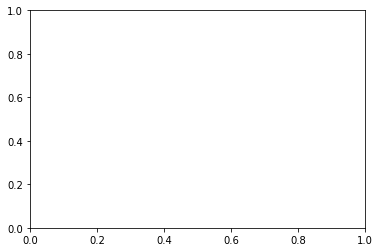

In [116]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

In [122]:
G = nx.erdos_renyi_graph(100, 0.03)

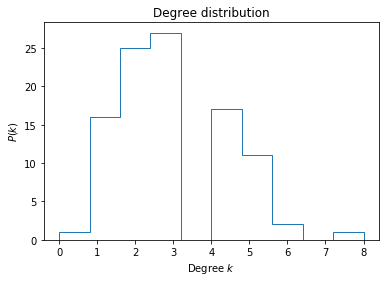

In [126]:
plot_degree_distribution(G)

In [129]:
G = nx.erdos_renyi_graph(100, 0.30)

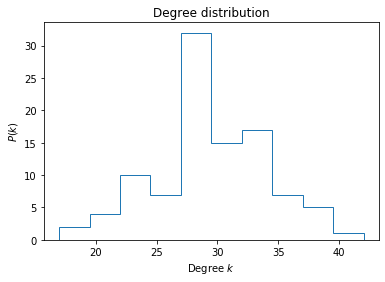

In [130]:
plot_degree_distribution(G)

In [133]:
import numpy as np
A1 = np.loadtxt('adj_allVillageRelationships_vilno_1.csv', delimiter=',')
A2 = np.loadtxt('adj_allVillageRelationships_vilno_2.csv', delimiter=',')

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


In [138]:
def basic_net_stats(G):
    print('Number of nodes: %d' % G.number_of_nodes())
    print('Number of edges: %d' % G.number_of_edges())
    print('Average degree: %.2f' % np.mean(list(dict(G.degree()).values())))

In [139]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


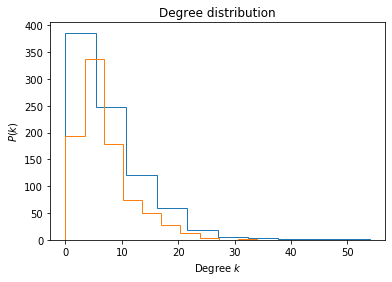

In [140]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [143]:
def connected_component_subgraphs(G):  
    for c in nx.connected_components(G):  
        yield G.subgraph(c)

In [160]:
gen = connected_component_subgraphs(G1)

In [161]:
g = gen.__next__()

In [147]:
type(g)

networkx.classes.graph.Graph

In [148]:
g.number_of_nodes()

825

In [162]:
len(gen.__next__())

3

In [163]:
len(G1)

843

In [165]:
G1_LCC = max(connected_component_subgraphs(G1), key=len)
G2_LCC = max(connected_component_subgraphs(G2), key=len)

In [166]:
len(G1_LCC)

825

In [176]:
len(G2_LCC)

810

In [169]:
G1_LCC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

In [170]:
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

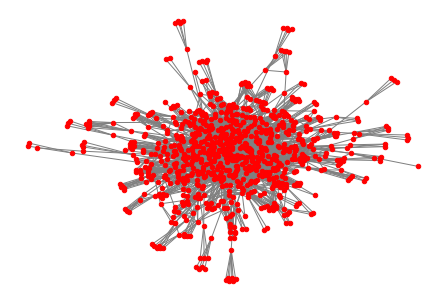

In [171]:
plt.figure()
nx.draw(G1_LCC, node_color='red', edge_color='gray', node_size=20)
plt.savefig('vilage.pdf')

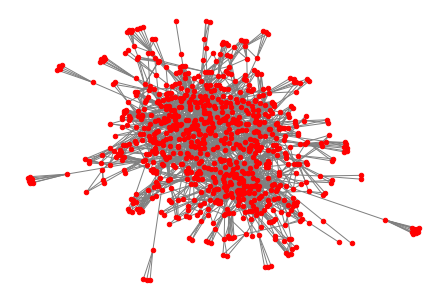

In [173]:
plt.figure()
nx.draw(G2_LCC, node_color='red', edge_color='gray', node_size=20)
plt.savefig('vilage.pdf')

In [174]:
basic_net_stats(G1_LCC)

Number of nodes: 825
Number of edges: 3386
Average degree: 8.21


In [175]:
basic_net_stats(G2_LCC)

Number of nodes: 810
Number of edges: 2924
Average degree: 7.22
